## Лабораторная работа №1 | Вариант 5

Выполнил: Юхнев Арсений М8О-312Б-23

### 1. Numpy

In [2]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [3]:
a = np.eye(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [4]:
RGBA_pix = np.dtype([('Red', np.uint8), ('Blue', np.uint8), ('Green', np.uint8), ('Alpha', np.uint8)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [5]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [6]:
vec = np.random.rand(10)
vec = np.sort(vec)
print(vec)

[0.01161073 0.02429239 0.02861148 0.03201168 0.12374297 0.12722275
 0.17938362 0.18956535 0.56471465 0.81395232]


5. Создайте read-only массив(неизменяемый)

In [7]:
a = np.array([1, 2, 3, 4, 5])
a.flags.writable = False
a[0] = 10

AttributeError: 'numpy._core.multiarray.flagsobj' object has no attribute 'writable'

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [19]:
matrix = np.random.rand(10, 2)
x = matrix[0:10, 0]
y = matrix[:, 1]
r = np.sqrt(x ** 2 + y ** 2)
angle = np.arctan2(y, x)
polar = np.column_stack((r, angle))
print(polar)

[[0.75065896 1.14245512]
 [0.55553433 0.22452596]
 [0.45825094 0.60668748]
 [0.9386652  1.51709697]
 [1.05136914 0.9952458 ]
 [0.93796876 0.56496557]
 [1.03880962 0.82537958]
 [1.06368822 0.81341336]
 [1.06165227 0.41871912]
 [1.30019657 0.78668198]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [20]:
n_points = 10
x = np.linspace(0, 1, n_points)
y = np.linspace(0, 1, n_points)
X, Y = np.meshgrid(x, y)
dtype = [('x', 'float64'), ('y', 'float64')]
coordinates = np.zeros(X.shape, dtype=dtype)
coordinates['x'] = X
coordinates['y'] = Y

print(coordinates)

[[(0.        , 0.        ) (0.11111111, 0.        )
  (0.22222222, 0.        ) (0.33333333, 0.        )
  (0.44444444, 0.        ) (0.55555556, 0.        )
  (0.66666667, 0.        ) (0.77777778, 0.        )
  (0.88888889, 0.        ) (1.        , 0.        )]
 [(0.        , 0.11111111) (0.11111111, 0.11111111)
  (0.22222222, 0.11111111) (0.33333333, 0.11111111)
  (0.44444444, 0.11111111) (0.55555556, 0.11111111)
  (0.66666667, 0.11111111) (0.77777778, 0.11111111)
  (0.88888889, 0.11111111) (1.        , 0.11111111)]
 [(0.        , 0.22222222) (0.11111111, 0.22222222)
  (0.22222222, 0.22222222) (0.33333333, 0.22222222)
  (0.44444444, 0.22222222) (0.55555556, 0.22222222)
  (0.66666667, 0.22222222) (0.77777778, 0.22222222)
  (0.88888889, 0.22222222) (1.        , 0.22222222)]
 [(0.        , 0.33333333) (0.11111111, 0.33333333)
  (0.22222222, 0.33333333) (0.33333333, 0.33333333)
  (0.44444444, 0.33333333) (0.55555556, 0.33333333)
  (0.66666667, 0.33333333) (0.77777778, 0.33333333)
  (0.8888

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [26]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
def Coshi_func(i, j):
    eps=1e-12
    i = i.astype(int)
    j = j.astype(int)
    denom = x[i] - y[j]
    return np.where(np.abs(denom) < eps, 1 / eps, 1 / denom)

coshi = np.fromfunction(Coshi_func, (len(x), len(y)), dtype=float)
print(coshi)

[[  0.37357822   1.61383297   0.45392294   1.18953432   0.57465085]
 [  0.54838529  -4.28013802   0.7408851  -79.27054074   1.12751398]
 [  0.60302918  -2.50703094   0.84424087  -5.62252908   1.38568241]
 [  1.18135237  -0.82597851   2.68320214  -1.01044502 -11.09373494]
 [  0.33627721   1.09103095   0.40000983   0.87905397   0.49089185]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [27]:
arr_float = np.array([1.5, 2.7, 3.1, 4.9], dtype=np.float32)
print(arr_float, arr_float.dtype)
arr_int = arr_float.view(np.int32)
print(arr_int, arr_int.dtype)

[1.5 2.7 3.1 4.9] float32
[1069547520 1076677837 1078355558 1084017869] int32


10. Как случайно заменить p элементов в 2D массиве?

In [30]:
a = np.arange(15)
p = 4
np.put(a, np.random.choice(range(a.size), p, replace=False), 1000)
print(a)

[1000 1000    2    3    4    5    6 1000    8    9   10   11   12 1000
   14]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [31]:
import pandas as pd

In [33]:
df = pd.read_csv("data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Узнайте сколько было на борту человек

In [34]:
total_people = df["PassengerId"].count()
print(total_people)

891


2. Какой медианный и средний возраста пассажиров

In [35]:
print(f'Mean age: {df["Age"].mean()}')
print(f'Median age: {df["Age"].median()}')

Mean age: 29.69911764705882
Median age: 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [37]:
only_with_age = df[df["Age"].notna()]
children = only_with_age[only_with_age["Age"] < 16]
adults = only_with_age[only_with_age["Age"] >= 16]
children_survived = children["Survived"].mean() * 100
adults_survived = adults["Survived"].mean() * 100
print("Процент выживаемости детей: ", children_survived)
print("Процент выживаемости взрослых: ", adults_survived)

Процент выживаемости детей:  59.036144578313255
Процент выживаемости взрослых:  38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [68]:
only_with_age = df[df["Age"].notna()].copy()
def categorize(row):
    if row["Sex"] == "female" or row["Age"] < 16:
        return "бабы и мелюзга"
    else:
        return "мужики"

only_with_age["Category"] = only_with_age.apply(categorize, axis=1)
print("\nбабы и мелюзга vs взрослые мужики:")
survival_comparison = only_with_age.groupby("Category")["Survived"].mean() * 100
print(survival_comparison)
women_children_rate = survival_comparison["бабы и мелюзга"]
adult_men_rate = survival_comparison["мужики"]
print(f"\nбабы и мелюзга: {women_children_rate:.2f}%")
print(f"мужики: {adult_men_rate:.2f}%")
print(f"Разница: {women_children_rate - adult_men_rate:.1f}%")

if women_children_rate > adult_men_rate:
    print(f"\nбабы и мелюзга выживали чаще на {women_children_rate - adult_men_rate:.1f}%")
    print("гипотеза тру")
else:
    print(f"\nмужики выживали чаще на {adult_men_rate - women_children_rate:.1f}%")
    print("гипотеза балабол")


бабы и мелюзга vs взрослые мужики:
Category
бабы и мелюзга    72.425249
мужики            17.433414
Name: Survived, dtype: float64

бабы и мелюзга: 72.43%
мужики: 17.43%
Разница: 55.0%

бабы и мелюзга выживали чаще на 55.0%
гипотеза тру


5. Зависит ли выживаемость от класса обслуживания?

In [39]:
class_survived = df.groupby("Pclass")["Survived"].mean() * 100
class1 = class_survived[1]
class2 = class_survived[2]
class3 = class_survived[3]
print(f"1 класс {class1}%")
print(f"2 класс {class2}%")
print(f"3 класс {class3}%")

if (class1 or class2) > class3:
    print("Зависит")


1 класс 62.96296296296296%
2 класс 47.28260869565217%
3 класс 24.236252545824847%
Зависит


6. Посчитайте средний возраст умерших женщин и мужчин

In [69]:
rip = df[df["Survived"] == 0]
mean_age_rip = rip.groupby("Sex")["Age"].mean()
avg_fem = mean_age_rip.get("female")
avg_m = mean_age_rip.get("male")
print(f"Средний возраст мужчин - {avg_m:.2f}")
print(f"Средний возраст женщин - {avg_fem:.2f}")


Средний возраст мужчин - 31.62
Средний возраст женщин - 25.05


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [70]:
df["Family_Onboard"] = (df["SibSp"] > 0) | (df["Parch"] > 0)
df["Passenger_Type"] = df["Family_Onboard"].map(
    {True: "Семейные", False: "Одиночные"})

survival_rates = df.groupby("Passenger_Type")["Survived"].mean() * 100
family_survival = survival_rates["Семейные"]
solo_survival = survival_rates["Одиночные"]

difference = abs(family_survival - solo_survival)

if family_survival > solo_survival:
    print(f"Пассажиры с семьёй демонстрировали выживаемость на {difference:.1f}% выше")
    print("Наличие родственных связей положительно влияло на шансы спасения")
else:
    print(f"Путешествующие в одиночку выживали на {difference:.1f}% чаще")
    print("Отсутствие семьи могло способствовать более быстрой эвакуации")

Пассажиры с семьёй демонстрировали выживаемость на 20.2% выше
Наличие родственных связей положительно влияло на шансы спасения


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [71]:
fare_comparison = df.groupby("Survived")["Fare"].mean()
fare_not_survived = fare_comparison[0]
fare_survived = fare_comparison[1]

print(f"Стоимость билета у погибших: ${fare_not_survived:.2f}")
print(f"Стоимость билета у выживших: ${fare_survived:.2f}")

price_difference = fare_survived - fare_not_survived

if price_difference > 0:
    print(f"Разница в стоимости составляет ${abs(price_difference):.2f} в пользу выживших")
    print("Наблюдается корреляция между стоимостью билета и выживаемостью")
else:
    print(f"Разница в стоимости составляет ${abs(price_difference):.2f} в пользу погибших")
    print("Обнаружена обратная зависимость стоимости билета от выживаемости")

Стоимость билета у погибших: $22.12
Стоимость билета у выживших: $48.40
Разница в стоимости составляет $26.28 в пользу выживших
Наблюдается корреляция между стоимостью билета и выживаемостью


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [46]:
class2 = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]["Age"]
print(f"Max {class2.max()}, min {class2.min()}")

Max 62.0, min 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [72]:
male_passengers = df[df["Sex"] == "male"].copy()
male_passengers["Age_Group"] = male_passengers["Age"].apply(
    lambda age: "18-30 лет" if 18 < age <= 30 else "Старше 30 лет"
)

survival_by_age = male_passengers.groupby("Age_Group")["Survived"].mean() * 100
young_survival = survival_by_age.get("18-30 лет", 0)
older_survival = survival_by_age.get("Старше 30 лет", 0)

age_gap = young_survival - older_survival

if age_gap > 0:
    print("Анализ подтверждает возрастное преимущество в выживаемости")
    print(f"Мужчины 18-30 лет: {young_survival:.1f}% выживших")
    print(f"Мужчины старше 30 лет: {older_survival:.1f}% выживших")
    print(f"Преимущество молодой группы: +{age_gap:.1f}%")
else:
    print("Возрастной фактор не подтверждается статистикой")
    print(f"Мужчины 18-30 лет: {young_survival:.1f}% выживших")
    print(f"Мужчины старше 30 лет: {older_survival:.1f}% выживших")
    print(f"Преимущество старшей группы: +{abs(age_gap):.1f}%")

Возрастной фактор не подтверждается статистикой
Мужчины 18-30 лет: 15.6% выживших
Мужчины старше 30 лет: 20.4% выживших
Преимущество старшей группы: +4.8%


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

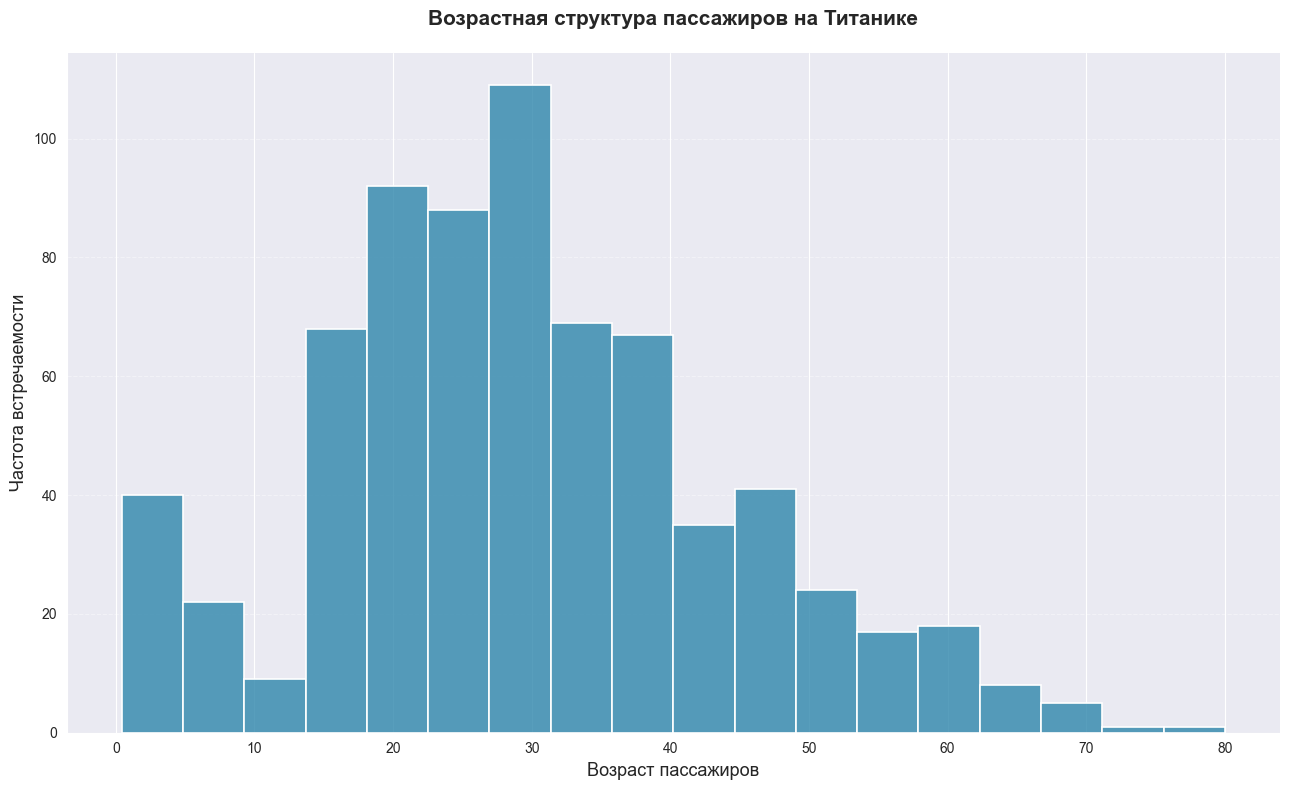

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(13, 8))

sns.histplot(
    data=df,
    x="Age",
    bins=18,
    color="#2E86AB",
    edgecolor="white",
    alpha=0.8,
    linewidth=1.2
)

ax.set_xlabel("Возраст пассажиров", fontsize=13, fontweight="medium")
ax.set_ylabel("Частота встречаемости", fontsize=13, fontweight="medium")
ax.set_title(
    "Возрастная структура пассажиров на Титанике",
    fontsize=15,
    fontweight="bold",
    pad=20
)

ax.grid(axis="y", alpha=0.4, linestyle="--")
ax.spines[["top", "right"]].set_visible(False)

plt.tight_layout()
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

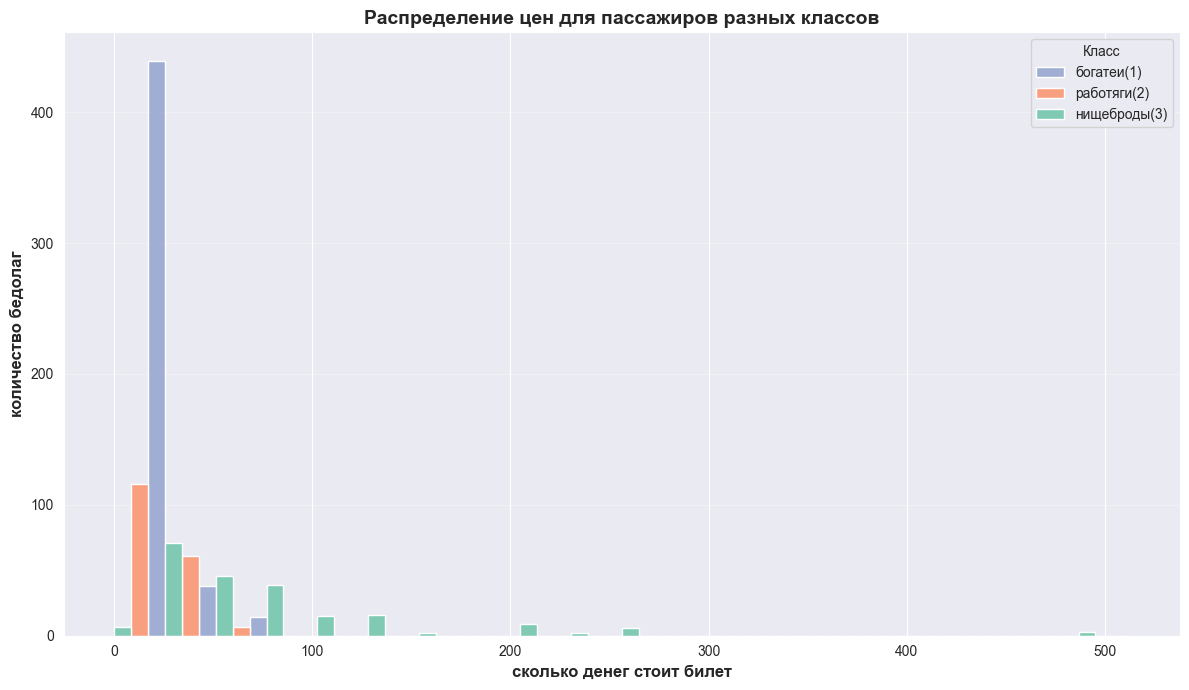

In [79]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x="Fare", hue="Pclass", bins=20,
             palette="Set2", alpha=0.8, edgecolor="white",
             multiple="dodge")

plt.xlabel("сколько денег стоит билет", fontsize=12, fontweight="bold")
plt.ylabel("количество бедолаг", fontsize=12, fontweight="bold")
plt.title("Распределение цен для пассажиров разных классов",
          fontsize=14, fontweight="bold")
plt.legend(title="Класс", labels=["богатеи(1)", "работяги(2)", "нищеброды(3)"])
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

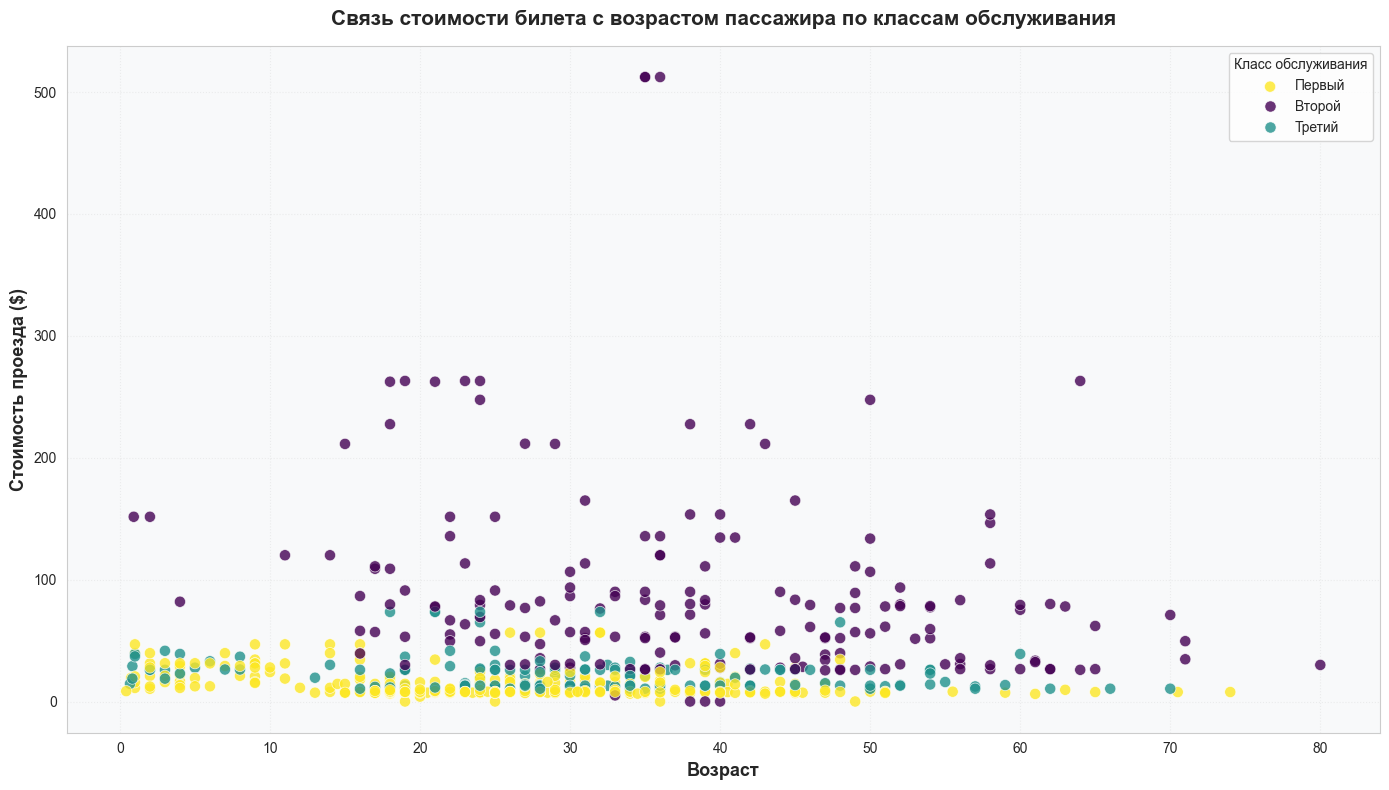

In [81]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))

sns.scatterplot(
    data=df,
    x="Age",
    y="Fare",
    hue="Pclass",
    palette="viridis",
    alpha=0.8,
    s=65,
    edgecolor="white",
    linewidth=0.5
)

ax.set_xlabel("Возраст", fontsize=13, fontweight="semibold")
ax.set_ylabel("Стоимость проезда ($)", fontsize=13, fontweight="semibold")
ax.set_title(
    "Связь стоимости билета с возрастом пассажира по классам обслуживания",
    fontsize=15,
    fontweight="bold",
    pad=15
)

plt.legend(
    title="Класс обслуживания",
    labels=["Первый", "Второй", "Третий"],
    frameon=True,
    fancybox=True
)

ax.grid(True, alpha=0.3, linestyle=":")
ax.set_facecolor("#f8f9fa")

plt.tight_layout()
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

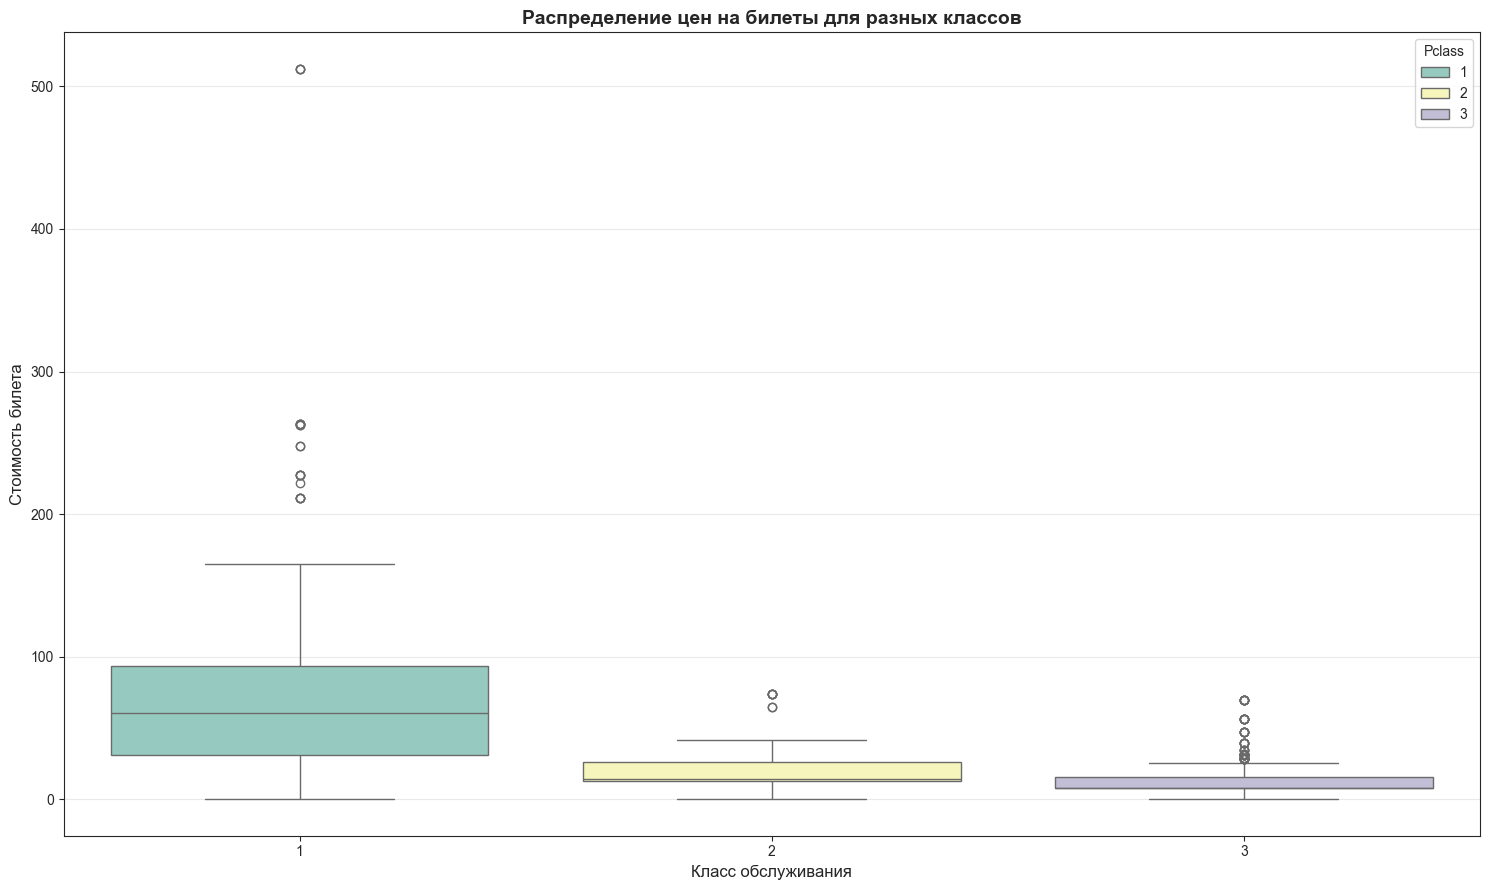

In [82]:
sns.set_style("ticks")
plt.figure(figsize=(15, 9))
sns.boxplot(data=df, x="Pclass", y="Fare",
            hue="Pclass", palette="Set3", legend=True)
plt.xlabel("Класс обслуживания", fontsize=12)
plt.ylabel("Стоимость билета", fontsize=12)
plt.title("Распределение цен на билеты для разных классов",
          fontsize=14, fontweight="bold")
plt.grid(axis="y", alpha=0.4)
plt.tight_layout()
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

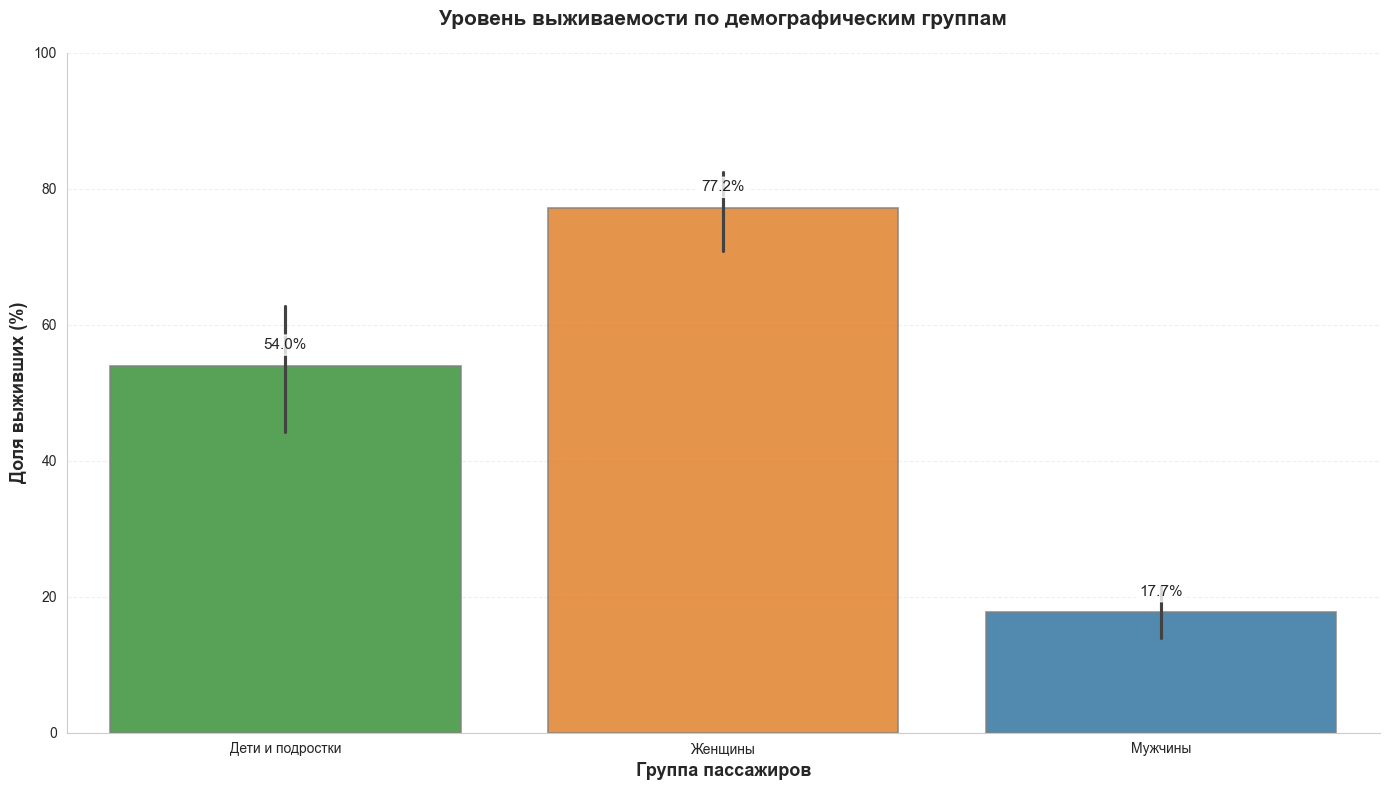

In [84]:
df_clean = df[df["Age"].notna()].copy()

def passenger_group(row):
    if row["Age"] < 18:
        return "Дети и подростки"
    elif row["Sex"] == "female":
        return "Женщины"
    else:
        return "Мужчины"

df_clean["Passenger_Group"] = df_clean.apply(passenger_group, axis=1)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(
    data=df_clean,
    x='Passenger_Group',
    y='Survived',
    hue='Passenger_Group',
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
    edgecolor='gray',
    linewidth=1.2,
    alpha=0.85,
    estimator=lambda x: (x.sum() / len(x)) * 100,
    order=['Дети и подростки', 'Женщины', 'Мужчины'],
    legend=False,
    ax=ax
)

ax.set_xlabel('Группа пассажиров', fontsize=13, fontweight='semibold')
ax.set_ylabel('Доля выживших (%)', fontsize=13, fontweight='semibold')
ax.set_title(
    'Уровень выживаемости по демографическим группам',
    fontsize=15,
    fontweight='bold',
    pad=20
)

ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.spines[['top', 'right']].set_visible(False)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                f'{height:.1f}%', ha='center', va='bottom',
                fontsize=11, fontweight='medium',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

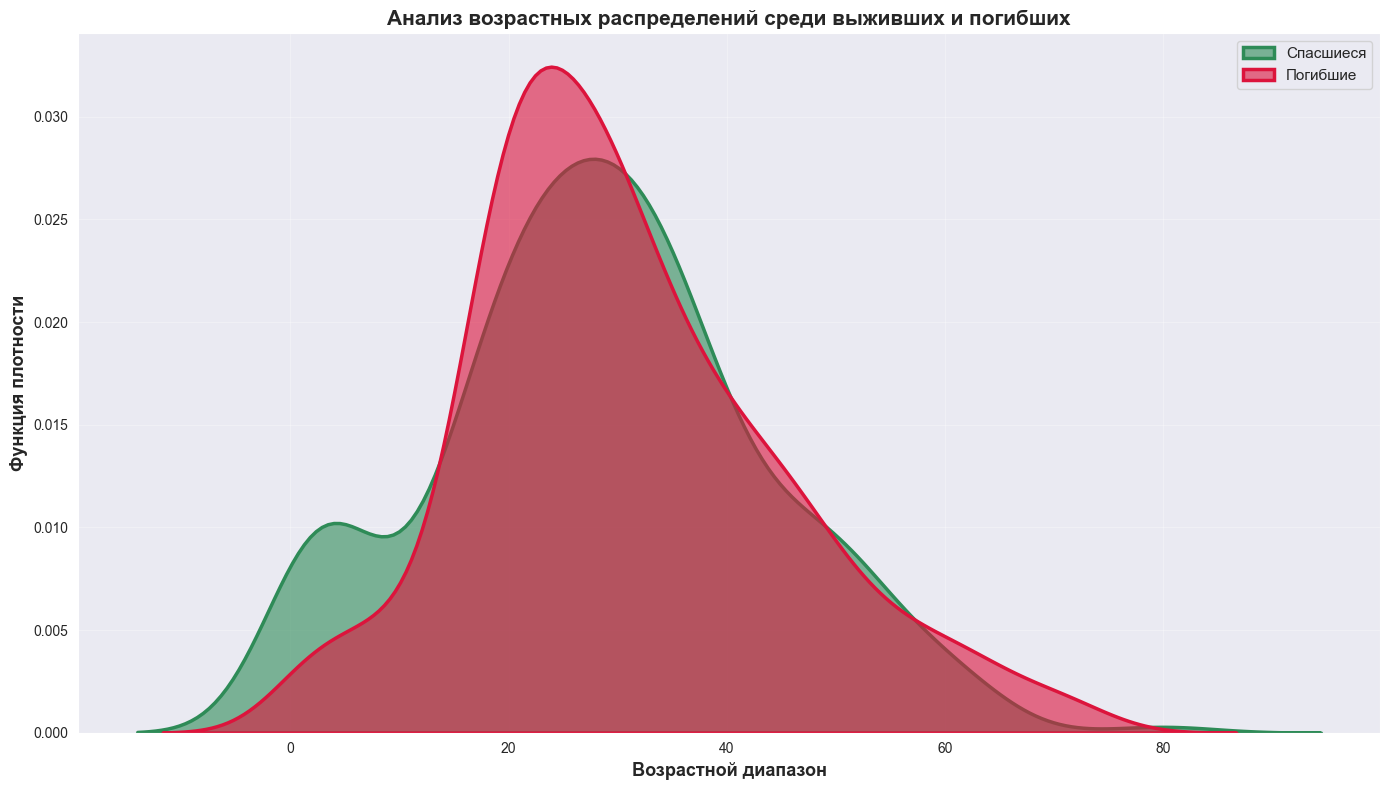

Статистический анализ возрастных показателей:
Средний возраст выживших: 28.3 лет
Средний возраст погибших: 30.6 лет

Медианный возраст выживших: 28.0 лет
Медианный возраст погибших: 28.0 лет


In [85]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))

survived_ages = df[df["Survived"] == 1]["Age"].dropna()
deceased_ages = df[df["Survived"] == 0]["Age"].dropna()

sns.kdeplot(survived_ages, label="Спасшиеся", color="#2E8B57",
            fill=True, alpha=0.6, linewidth=2.5)
sns.kdeplot(deceased_ages, label="Погибшие", color="#DC143C",
            fill=True, alpha=0.6, linewidth=2.5)

plt.xlabel("Возрастной диапазон", fontsize=13, fontweight="semibold")
plt.ylabel("Функция плотности", fontsize=13, fontweight="semibold")
plt.title("Анализ возрастных распределений среди выживших и погибших",
          fontsize=15, fontweight="bold")
plt.legend(fontsize=11, frameon=True, fancybox=True)
plt.grid(axis="both", alpha=0.3)
plt.tight_layout()
plt.show()

print("Статистический анализ возрастных показателей:")
print("=" * 55)
print(f"Средний возраст выживших: {survived_ages.mean():.1f} лет")
print(f"Средний возраст погибших: {deceased_ages.mean():.1f} лет")
print(f"\nМедианный возраст выживших: {survived_ages.median():.1f} лет")
print(f"Медианный возраст погибших: {deceased_ages.median():.1f} лет")

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

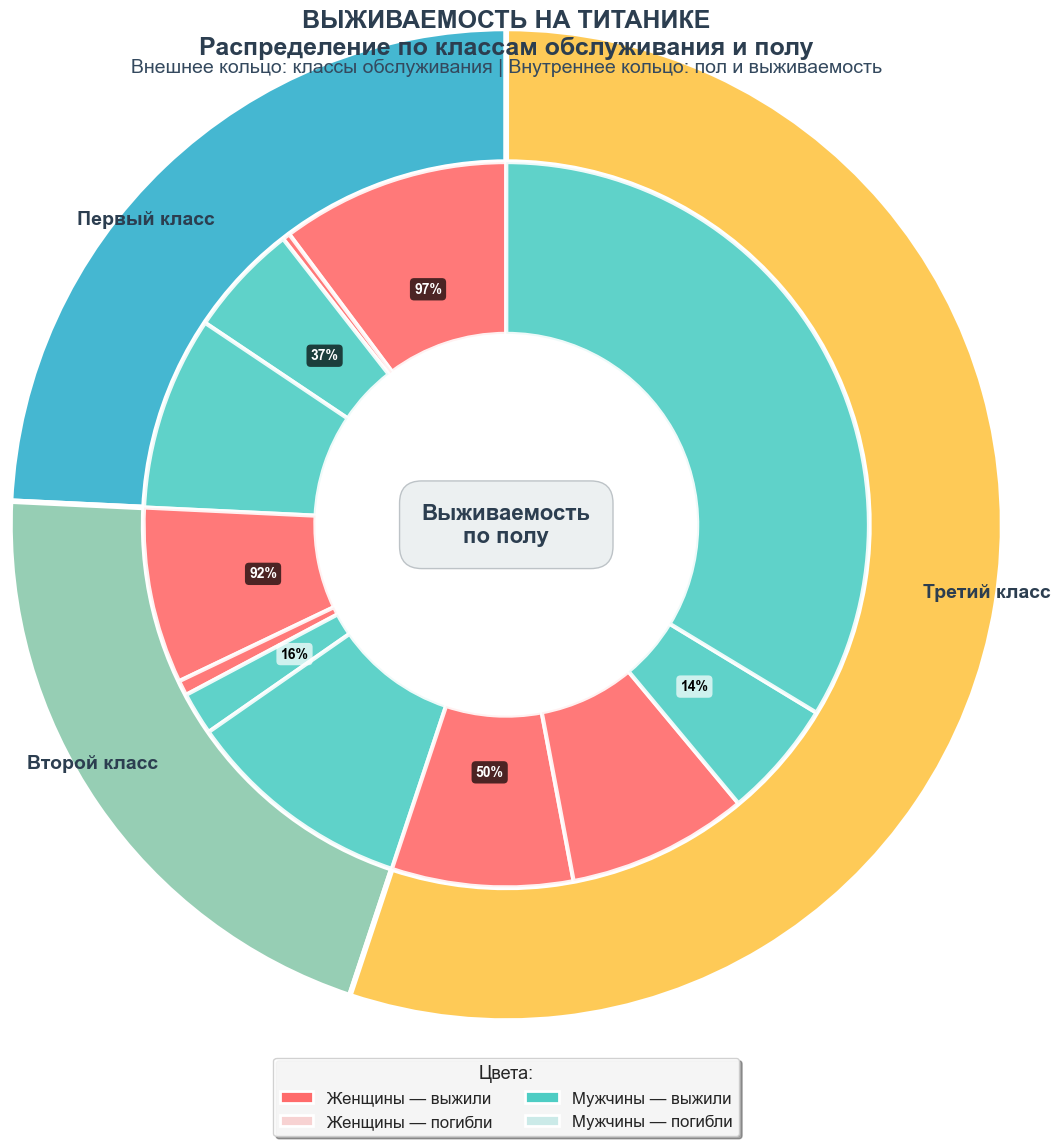

In [67]:
def prepare_survival_data(df):
    agg_data = df.groupby(["Pclass", "Sex", "Survived"]).size().reset_index(name="Count")

    config = {
        'sex_names': {"female": "Женщины", "male": "Мужчины"},
        'class_names': {1: "Первый класс", 2: "Второй класс", 3: "Третий класс"},
        'sex_colors': {"female": "#FF6B6B", "male": "#4ECDC4"},
        'class_colors': ["#45B7D1", "#96CEB4", "#FECA57"],
        'dead_alpha': 0.25
    }

    return agg_data, config

def create_survival_donut_chart(df):

    agg_data, config = prepare_survival_data(df)

    outer_sizes = [agg_data[agg_data["Pclass"] == cls]["Count"].sum() for cls in [1, 2, 3]]
    outer_labels = [config['class_names'][cls] for cls in [1, 2, 3]]

    inner_sizes, inner_colors, segment_info = [], [], []

    for class_num in [1, 2, 3]:
        class_data = agg_data[agg_data["Pclass"] == class_num]

        for sex in ["female", "male"]:
            survived_count = class_data[(class_data["Sex"] == sex) &
                                      (class_data["Survived"] == 1)]["Count"].sum()
            dead_count = class_data[(class_data["Sex"] == sex) &
                                  (class_data["Survived"] == 0)]["Count"].sum()

            if survived_count > 0:
                inner_sizes.append(survived_count)
                inner_colors.append(config['sex_colors'][sex])
                segment_info.append({
                    'sex': config['sex_names'][sex],
                    'class': class_num,
                    'survived': True,
                    'count': survived_count,
                    'total': survived_count + dead_count
                })

            if dead_count > 0:
                base_color = plt.matplotlib.colors.to_rgb(config['sex_colors'][sex])
                dead_color = (*base_color, config['dead_alpha'])
                inner_sizes.append(dead_count)
                inner_colors.append(dead_color)
                segment_info.append({
                    'sex': config['sex_names'][sex],
                    'class': class_num,
                    'survived': False,
                    'count': dead_count,
                    'total': survived_count + dead_count
                })

    fig, ax = plt.subplots(figsize=(16, 12), subplot_kw=dict(aspect="equal"))
    fig.patch.set_facecolor('#FFFFFF')

    fig.suptitle(
        "ВЫЖИВАЕМОСТЬ НА ТИТАНИКЕ\nРаспределение по классам обслуживания и полу",
        fontsize=18,
        fontweight='bold',
        color='#2C3E50',
        y=0.95
    )

    # Подзаголовок
    ax.set_title(
        "Внешнее кольцо: классы обслуживания | Внутреннее кольцо: пол и выживаемость",
        fontsize=14,
        color='#34495E',
        y = 0.93,
        pad=30,
        fontweight='normal'
    )


    wedges_outer, _ = ax.pie(
        outer_sizes,
        labels=outer_labels,
        colors=config['class_colors'],
        radius=1.3,
        startangle=90,
        wedgeprops=dict(
            width=0.35,
            edgecolor='white',
            linewidth=4,
            linestyle='-'
        ),
        textprops={
            'fontsize': 14,
            'fontweight': 'bold',
            'color': '#2C3E50'
        },
        labeldistance=0.85
    )

    wedges_inner, _ = ax.pie(
        inner_sizes,
        colors=inner_colors,
        radius=0.95,
        startangle=90,
        wedgeprops=dict(
            width=0.45,
            edgecolor='white',
            linewidth=3,
            alpha=0.9
        )
    )

    add_survival_percentages(ax, wedges_inner, segment_info)

    from matplotlib.patches import Patch

    legend_elements = [
        Patch(facecolor=config['sex_colors']['female'], label='Женщины — выжили',
              edgecolor='white', linewidth=2),
        Patch(facecolor=(*plt.matplotlib.colors.to_rgb(config['sex_colors']['female']),
                        config['dead_alpha']),
              label='Женщины — погибли', edgecolor='white', linewidth=2),
        Patch(facecolor=config['sex_colors']['male'], label='Мужчины — выжили',
              edgecolor='white', linewidth=2),
        Patch(facecolor=(*plt.matplotlib.colors.to_rgb(config['sex_colors']['male']),
                        config['dead_alpha']),
              label='Мужчины — погибли', edgecolor='white', linewidth=2),
    ]

    ax.legend(
        handles=legend_elements,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.05),
        ncol=2,
        frameon=True,
        fancybox=True,
        shadow=True,
        fontsize=12,
        title='Цвета:',
        title_fontsize=13,
        framealpha=0.9
    )

    ax.text(0, 0, "Выживаемость\nпо полу",
            ha='center', va='center',
            fontsize=16, fontweight='bold',
            color='#2C3E50',
            bbox=dict(boxstyle="round,pad=1", facecolor='#ECF0F1', edgecolor='#BDC3C7'))

    plt.tight_layout()
    plt.show()

def add_survival_percentages(ax, wedges, segment_info):
    for wedge, info in zip(wedges, segment_info):
        if info['survived'] and info['total'] > 0:
            survival_rate = (info['count'] / info['total']) * 100

            theta = np.deg2rad((wedge.theta1 + wedge.theta2) / 2)
            radius = 0.65

            x = radius * np.cos(theta)
            y = radius * np.sin(theta)

            text_color = 'white' if survival_rate > 30 else 'black'

            ax.text(
                x, y,
                f"{survival_rate:.0f}%",
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                color=text_color,
                bbox=dict(
                    boxstyle='round,pad=0.3',
                    facecolor='#000000' if survival_rate > 30 else '#FFFFFF',
                    edgecolor='none',
                    alpha=0.7
                )
            )
create_survival_donut_chart(df)